In [202]:

# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
import csv
from pathlib import Path
import numpy as np

%matplotlib inline

In [222]:
#set key
key = open('../APIKey.txt').read()

In [3]:
#test API connection
ts = TimeSeries (key, output_format='pandas')


In [223]:
    def get_daily(self, symbol, outputsize='full'):
        """ Return daily time series in two json objects as data and
        meta_data. It raises ValueError when problems arise
        Keyword Arguments:
            symbol:  the symbol for the equity we want to get its data
            outputsize:  The size of the call, supported values are
                'compact' and 'full; the first returns the last 100 points in the
                data series, and 'full' returns the full-length daily times
                series, commonly above 1MB (default 'compact')
        """
        _FUNCTION_KEY = "TIME_SERIES_DAILY"
        return _FUNCTION_KEY, 'Time Series (Daily)', 'Meta Data'

In [224]:
data2, meta = ts.get_daily('SQ', outputsize='full')

In [225]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1611 entries, 2022-04-13 to 2015-11-19
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    1611 non-null   float64
 1   2. high    1611 non-null   float64
 2   3. low     1611 non-null   float64
 3   4. close   1611 non-null   float64
 4   5. volume  1611 non-null   float64
dtypes: float64(5)
memory usage: 75.5 KB


In [226]:
data2.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2022-04-13,121.40,126.66,120.50,126.05,10789101.0
2022-04-12,126.02,130.89,121.50,122.89,15351351.0
2022-04-11,120.28,125.73,118.92,123.08,12964961.0
2022-04-08,124.53,127.50,122.12,123.22,13654105.0
2022-04-07,128.00,132.80,120.11,125.93,19030561.0


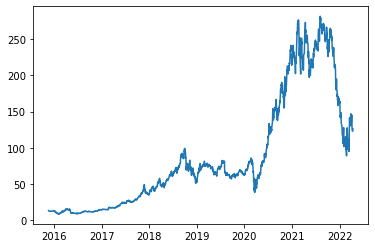

In [12]:
plt.plot(data2['4. close'])

In [59]:
#Getting Bitcoin
url = f'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=BTC&market=USD&apikey={key}'
r = requests.get(url)
data = r.json()
HistBTC = data['Time Series (Digital Currency Daily)']
HistBTC = pd.DataFrame(HistBTC)
HistBTC = pd.DataFrame.transpose(HistBTC)

In [60]:
HistBTC.head()

,1a. open (USD),1b. open (USD),2a. high (USD),2b. high (USD),3a. low (USD),3b. low (USD),4a. close (USD),4b. close (USD),5. volume,6. market cap (USD)
2022-04-14,41147.78000000,41147.78000000,41272.19000000,41272.19000000,41064.35000000,41064.35000000,41246.00000000,41246.00000000,707.24382000,707.24382000
2022-04-13,40074.95000000,40074.95000000,41561.31000000,41561.31000000,39588.54000000,39588.54000000,41147.79000000,41147.79000000,41342.27254000,41342.27254000
2022-04-12,39530.45000000,39530.45000000,40699.00000000,40699.00000000,39254.63000000,39254.63000000,40074.94000000,40074.94000000,57751.01778000,57751.01778000
2022-04-11,42158.85000000,42158.85000000,42414.71000000,42414.71000000,39200.00000000,39200.00000000,39530.45000000,39530.45000000,63560.44721000,63560.44721000
2022-04-10,42753.96000000,42753.96000000,43410.30000000,43410.30000000,41868.00000000,41868.00000000,42158.85000000,42158.85000000,22771.09403000,22771.09403000


In [123]:
BTC = HistBTC.drop(HistBTC.columns[[0,1,2,3,4,5,6]], axis=1)
BTC.head()

,4b. close (USD),5. volume,6. market cap (USD)
2022-04-14,41246.00000000,707.24382000,707.24382000
2022-04-13,41147.79000000,41342.27254000,41342.27254000
2022-04-12,40074.94000000,57751.01778000,57751.01778000
2022-04-11,39530.45000000,63560.44721000,63560.44721000
2022-04-10,42158.85000000,22771.09403000,22771.09403000


In [124]:
# Export to csv
BTC.to_csv('BTC.csv')

In [67]:
#Getting Ethereum
url = f'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=ETH&market=USD&apikey={key}'
r = requests.get(url)
data = r.json()
HistETH = data['Time Series (Digital Currency Daily)']
HistETH = pd.DataFrame(HistETH)
HistETH = pd.DataFrame.transpose(HistETH)

In [68]:
HistETH.head()

,1a. open (USD),1b. open (USD),2a. high (USD),2b. high (USD),3a. low (USD),3b. low (USD),4a. close (USD),4b. close (USD),5. volume,6. market cap (USD)
2022-04-14,3118.28000000,3118.28000000,3126.40000000,3126.40000000,3110.54000000,3110.54000000,3124.39000000,3124.39000000,9858.94660000,9858.94660000
2022-04-13,3027.65000000,3027.65000000,3128.97000000,3128.97000000,2996.86000000,2996.86000000,3118.28000000,3118.28000000,419101.49400000,419101.49400000
2022-04-12,2979.75000000,2979.75000000,3085.00000000,3085.00000000,2950.00000000,2950.00000000,3027.66000000,3027.66000000,579522.95050000,579522.95050000
2022-04-11,3203.04000000,3203.04000000,3213.63000000,3213.63000000,2950.00000000,2950.00000000,2979.74000000,2979.74000000,693394.29120000,693394.29120000
2022-04-10,3258.57000000,3258.57000000,3307.22000000,3307.22000000,3193.00000000,3193.00000000,3203.04000000,3203.04000000,232303.23260000,232303.23260000


In [121]:
ETH = HistETH.drop(HistETH.columns[[0,1,2,3,4,5,6]], axis=1)
ETH.head()

,4b. close (USD),5. volume,6. market cap (USD)
2022-04-14,3124.39000000,9858.94660000,9858.94660000
2022-04-13,3118.28000000,419101.49400000,419101.49400000
2022-04-12,3027.66000000,579522.95050000,579522.95050000
2022-04-11,2979.74000000,693394.29120000,693394.29120000
2022-04-10,3203.04000000,232303.23260000,232303.23260000


In [122]:
# Export to csv
ETH.to_csv('ETH.csv')

In [70]:
#Getting Solana
url = f'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=SOL&market=USD&apikey={key}'
r = requests.get(url)
data = r.json()
HistSOL = data['Time Series (Digital Currency Daily)']
HistSOL = pd.DataFrame(HistSOL)
HistSOL = pd.DataFrame.transpose(HistSOL)

In [71]:
HistSOL.head()

,1a. open (USD),1b. open (USD),2a. high (USD),2b. high (USD),3a. low (USD),3b. low (USD),4a. close (USD),4b. close (USD),5. volume,6. market cap (USD)
2022-04-14,104.92000000,104.92000000,105.50000000,105.50000000,104.53000000,104.53000000,105.40000000,105.40000000,35859.30000000,35859.30000000
2022-04-13,103.21000000,103.21000000,106.04000000,106.04000000,100.09000000,100.09000000,104.94000000,104.94000000,2204306.40000000,2204306.40000000
2022-04-12,99.64000000,99.64000000,109.36000000,109.36000000,98.31000000,98.31000000,103.22000000,103.22000000,3527634.19000000,3527634.19000000
2022-04-11,111.06000000,111.06000000,111.94000000,111.94000000,98.10000000,98.10000000,99.67000000,99.67000000,3332133.13000000,3332133.13000000
2022-04-10,112.97000000,112.97000000,116.09000000,116.09000000,109.71000000,109.71000000,111.07000000,111.07000000,1560720.04000000,1560720.04000000


In [112]:
SOL = HistSOL.drop(HistSOL.columns[[0,1,2,3,4,5,6]], axis=1)
SOL.head()

,4b. close (USD),5. volume,6. market cap (USD)
2022-04-14,105.40000000,35859.30000000,35859.30000000
2022-04-13,104.94000000,2204306.40000000,2204306.40000000
2022-04-12,103.22000000,3527634.19000000,3527634.19000000
2022-04-11,99.67000000,3332133.13000000,3332133.13000000
2022-04-10,111.07000000,1560720.04000000,1560720.04000000


In [113]:
# Export to csv
SOL.to_csv('SOL.csv')

In [152]:
#Getting BNB
url = f'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=BNB&market=USD&apikey={key}'
r = requests.get(url)
data = r.json()
BNB = data['Time Series (Digital Currency Daily)']
BNB = pd.DataFrame(BNB)
BNB = pd.DataFrame.transpose(BNB)
BNB.head()

,1a. open (USD),1b. open (USD),2a. high (USD),2b. high (USD),3a. low (USD),3b. low (USD),4a. close (USD),4b. close (USD),5. volume,6. market cap (USD)
2022-04-14,423.40000000,423.40000000,424.90000000,424.90000000,422.60000000,422.60000000,424.60000000,424.60000000,10419.42200000,10419.42200000
2022-04-13,413.70000000,413.70000000,424.60000000,424.60000000,410.30000000,410.30000000,423.40000000,423.40000000,630077.27700000,630077.27700000
2022-04-12,394.60000000,394.60000000,417.10000000,417.10000000,392.40000000,392.40000000,413.60000000,413.60000000,729790.91800000,729790.91800000
2022-04-11,418.10000000,418.10000000,419.70000000,419.70000000,391.20000000,391.20000000,394.60000000,394.60000000,856354.22400000,856354.22400000
2022-04-10,426.60000000,426.60000000,429.50000000,429.50000000,417.00000000,417.00000000,418.10000000,418.10000000,386650.88300000,386650.88300000


In [153]:
BNB = BNB.drop(BNB.columns[[0,1,2,3,4,5,6]], axis=1)
BNB.head()

,4b. close (USD),5. volume,6. market cap (USD)
2022-04-14,424.60000000,10419.42200000,10419.42200000
2022-04-13,423.40000000,630077.27700000,630077.27700000
2022-04-12,413.60000000,729790.91800000,729790.91800000
2022-04-11,394.60000000,856354.22400000,856354.22400000
2022-04-10,418.10000000,386650.88300000,386650.88300000


In [154]:
# Export to csv
BNB.to_csv('BNB.csv')

In [155]:
#Getting BNB
url = f'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=XRP&market=USD&apikey={key}'
r = requests.get(url)
data = r.json()
XRP = data['Time Series (Digital Currency Daily)']
XRP = pd.DataFrame(XRP)
XRP = pd.DataFrame.transpose(XRP)
XRP.head()

,1a. open (USD),1b. open (USD),2a. high (USD),2b. high (USD),3a. low (USD),3b. low (USD),4a. close (USD),4b. close (USD),5. volume,6. market cap (USD)
2022-04-14,0.72320000,0.72320000,0.72580000,0.72580000,0.72220000,0.72220000,0.72560000,0.72560000,3910414.00000000,3910414.00000000
2022-04-13,0.71510000,0.71510000,0.72520000,0.72520000,0.70170000,0.70170000,0.72320000,0.72320000,217937566.00000000,217937566.00000000
2022-04-12,0.69490000,0.69490000,0.73400000,0.73400000,0.69240000,0.69240000,0.71520000,0.71520000,263088987.00000000,263088987.00000000
2022-04-11,0.75430000,0.75430000,0.75580000,0.75580000,0.68020000,0.68020000,0.69480000,0.69480000,354459252.00000000,354459252.00000000
2022-04-10,0.76230000,0.76230000,0.77310000,0.77310000,0.75240000,0.75240000,0.75430000,0.75430000,123028708.00000000,123028708.00000000


In [156]:
XRP = XRP.drop(XRP.columns[[0,1,2,3,4,5,6]], axis=1)
XRP.head()

,4b. close (USD),5. volume,6. market cap (USD)
2022-04-14,0.72560000,3910414.00000000,3910414.00000000
2022-04-13,0.72320000,217937566.00000000,217937566.00000000
2022-04-12,0.71520000,263088987.00000000,263088987.00000000
2022-04-11,0.69480000,354459252.00000000,354459252.00000000
2022-04-10,0.75430000,123028708.00000000,123028708.00000000


In [157]:
# Export to csv
XRP.to_csv('XRP.csv')

In [104]:
#Getting GDP
url = f'https://www.alphavantage.co/query?function=REAL_GDP&interval=annual&apikey={key}'
r = requests.get(url)
data = r.json()

#GDP = data['data']
GDP = pd.DataFrame(data['data'])
#GDP = pd.DataFrame.transpose(GDP)

In [106]:
GDP.index = GDP['date']
GDP.head()

,date,value
date,,
2021-01-01,2021-01-01,19427.287
2020-01-01,2020-01-01,18384.687
2019-01-01,2019-01-01,19032.672
2018-01-01,2018-01-01,18606.787
2017-01-01,2017-01-01,18079.084


In [110]:
GDP = GDP.drop(GDP.columns[[0]], axis=1)
GDP.head()

,value
date,
2021-01-01,19427.287
2020-01-01,18384.687
2019-01-01,19032.672
2018-01-01,18606.787
2017-01-01,18079.084


In [111]:
# Export to csv
GDP.to_csv('GDP.csv')

In [117]:
#Getting Treasury Yield
url = f'https://www.alphavantage.co/query?function=TREASURY_YIELD&interval=monthly&maturity=10year&apikey={key}'
r = requests.get(url)
data = r.json()
#TYield = data['Time Series (Digital Currency Daily)']
#TYield = pd.DataFrame(TYield)
#TYield = pd.DataFrame.transpose(TYield)
TYield = pd.DataFrame(data['data'])

In [119]:
TYield.index = TYield['date']
TYield = TYield.drop(TYield.columns[[0]], axis=1)
TYield.head()

,value
date,
2022-03-01,2.13
2022-02-01,1.93
2022-01-01,1.76
2021-12-01,1.47
2021-11-01,1.56


In [120]:
# Export to csv
TYield.to_csv('TYield10y.csv')

In [125]:
#Getting Treasury Yield 2yr
url = f'https://www.alphavantage.co/query?function=TREASURY_YIELD&interval=monthly&maturity=2year&apikey={key}'
r = requests.get(url)
data = r.json()
#TYield = data['Time Series (Digital Currency Daily)']
#TYield = pd.DataFrame(TYield)
#TYield = pd.DataFrame.transpose(TYield)
TYield2 = pd.DataFrame(data['data'])

In [126]:
TYield2.index = TYield2['date']
TYield2 = TYield2.drop(TYield2.columns[[0]], axis=1)
TYield2.head()

,value
date,
2022-03-01,1.91
2022-02-01,1.44
2022-01-01,0.98
2021-12-01,0.68
2021-11-01,0.51


In [127]:
# Export to csv
TYield2.to_csv('TYield2y.csv')

In [129]:
#Getting Inflation
url = f'https://www.alphavantage.co/query?function=INFLATION&apikey={key}'
r = requests.get(url)
data = r.json()

Inflation = pd.DataFrame(data['data'])

In [130]:
Inflation.index = Inflation['date']
Inflation = Inflation.drop(Inflation.columns[[0]], axis=1)
Inflation.head()

,value
date,
2020-01-01,1.23358439630637
2019-01-01,1.81221007526015
2018-01-01,2.44258329692818
2017-01-01,2.13011000365963
2016-01-01,1.26158320570537


In [131]:
# Export to csv
Inflation.to_csv('Inflation.csv')

In [132]:
#Getting Inflation Expectation
url = f'https://www.alphavantage.co/query?function=INFLATION_EXPECTATION&apikey={key}'
r = requests.get(url)
data = r.json()

InflationExp = pd.DataFrame(data['data'])

In [133]:
InflationExp.index = InflationExp['date']
InflationExp = InflationExp.drop(InflationExp.columns[[0]], axis=1)
InflationExp.head()

,value
date,
2022-02-01,4.9
2022-01-01,4.9
2021-12-01,4.8
2021-11-01,4.9
2021-10-01,4.8


In [134]:
# Export to csv
InflationExp.to_csv('Inflation_Expectation.csv')

In [136]:
#Getting Consumer Sentiment
url = f'https://www.alphavantage.co/query?function=CONSUMER_SENTIMENT&apikey={key}'
r = requests.get(url)
data = r.json()

Sentiment = pd.DataFrame(data['data'])

In [137]:
Sentiment.index = Sentiment['date']
Sentiment = Sentiment.drop(Sentiment.columns[[0]], axis=1)
Sentiment.head()

,value
date,
2022-02-01,62.8
2022-01-01,67.2
2021-12-01,70.6
2021-11-01,67.4
2021-10-01,71.7


In [138]:
# Export to csv
Sentiment.to_csv('Consumer_Sentiment.csv')

In [150]:
#Getting Unemployment
url = f'https://www.alphavantage.co/query?function=UNEMPLOYMENT&apikey=demo{key}'
r = requests.get(url)
data = r.json()

Unemployment = pd.DataFrame(data['data'])
Unemployment.index = Unemployment['date']
Unemployment = Unemployment.drop(Unemployment.columns[[0]], axis=1)
Unemployment

,value
date,
2022-03-01,3.6
2022-02-01,3.8
2022-01-01,4.0
2021-12-01,3.9
2021-11-01,4.2
...,...
1948-05-01,3.5
1948-04-01,3.9
1948-03-01,4.0


In [151]:
# Export to csv
Unemployment.to_csv('Unemployment.csv')

In [212]:
#Defining Stocks

top_50_stocks=pd.read_csv(Path('Resources/constituents-financials.csv'))
t50 = top_50_stocks.drop(top_50_stocks.columns[[1,2,3,4,5,6,7,8,9,10,11,12,13,14]], axis=1)
t50.index = t50['Symbol']
t50 = t50.drop(t50.columns[[0]], axis=1)
top_50_df = pd.DataFrame.transpose(t50)
top_50_df

Symbol,AAPL,GOOGL,GOOG,MSFT,AMZN,FB,JPM,JNJ,XOM,BAC,...,AMGN,MO,NFLX,HON,MDT,GILD,NKE,UTX,BMY,ABT


In [209]:
#Loop
n=0
for i in range(0, n):
    ticker=i

Symbol,AAPL,GOOGL,GOOG,MSFT,AMZN,FB,JPM,JNJ,XOM,BAC,...,AMGN,MO,NFLX,HON,MDT,GILD,NKE,UTX,BMY,ABT


In [211]:
#loop to run each stock
##for Ticker in Ticker
##ticker=[]
#first_key = list(colors)[0]
#first_val = list(colors.values())[0]
first_key = list(top_50_df)[0]
first_key

#for 'Symbol' in range(0,49):
#    ticker = i
#Getting Earnings

##url = f'https://www.alphavantage.co/query?function=EARNINGS&symbol={ticker}&apikey={key}'
##r = requests.get(url)
##data = r.json()


#data
#Unemployment = pd.DataFrame(data['data'])
#Unemployment.index = Unemployment['date']
#Unemployment = Unemployment.drop(Unemployment.columns[[0]], axis=1)
#Unemployment

'AAPL'

In [213]:
url = f'https://www.alphavantage.co/query?function=EARNINGS&symbol=IBM&apikey={key}'
r = requests.get(url)
data = r.json()

#data
Ticker1 = pd.DataFrame(data['annualEarnings'])
Ticker1.index = Ticker1['fiscalDateEnding']
Ticker1 = Ticker1.drop(Ticker1.columns[[0]], axis=1)
Ticker1

,reportedEPS
fiscalDateEnding,
2022-03-31,0
2021-12-31,9.97
2020-12-31,8.67
2019-12-31,12.81
2018-12-31,13.82
2017-12-31,13.83
2016-12-31,13.6
2015-12-31,14.93
2014-12-31,16.27


In [13]:
# Export to csv
#df.to_csv('FileName.csv')